<a href="https://colab.research.google.com/github/Athira-M-Chandran/Deep-Learning/blob/main/11_TransferLearningPoC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

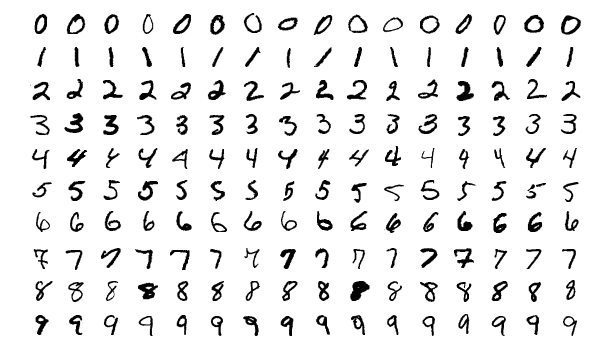

#MNIST dataset

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
(X_train_full,y_train_full),(X_test, y_test) = mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train_full.shape

(60000,)

In [8]:
y_train_full[0]

5

In [9]:
X_test.shape

(10000, 28, 28)

In [10]:
y_test.shape

(10000,)

In [11]:
img = X_train_full[0]

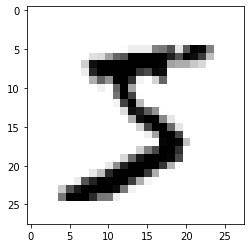

In [12]:
plt.imshow(img,cmap = "binary")

In [13]:
label = y_train_full[0]
label # ranges between 0-9

5

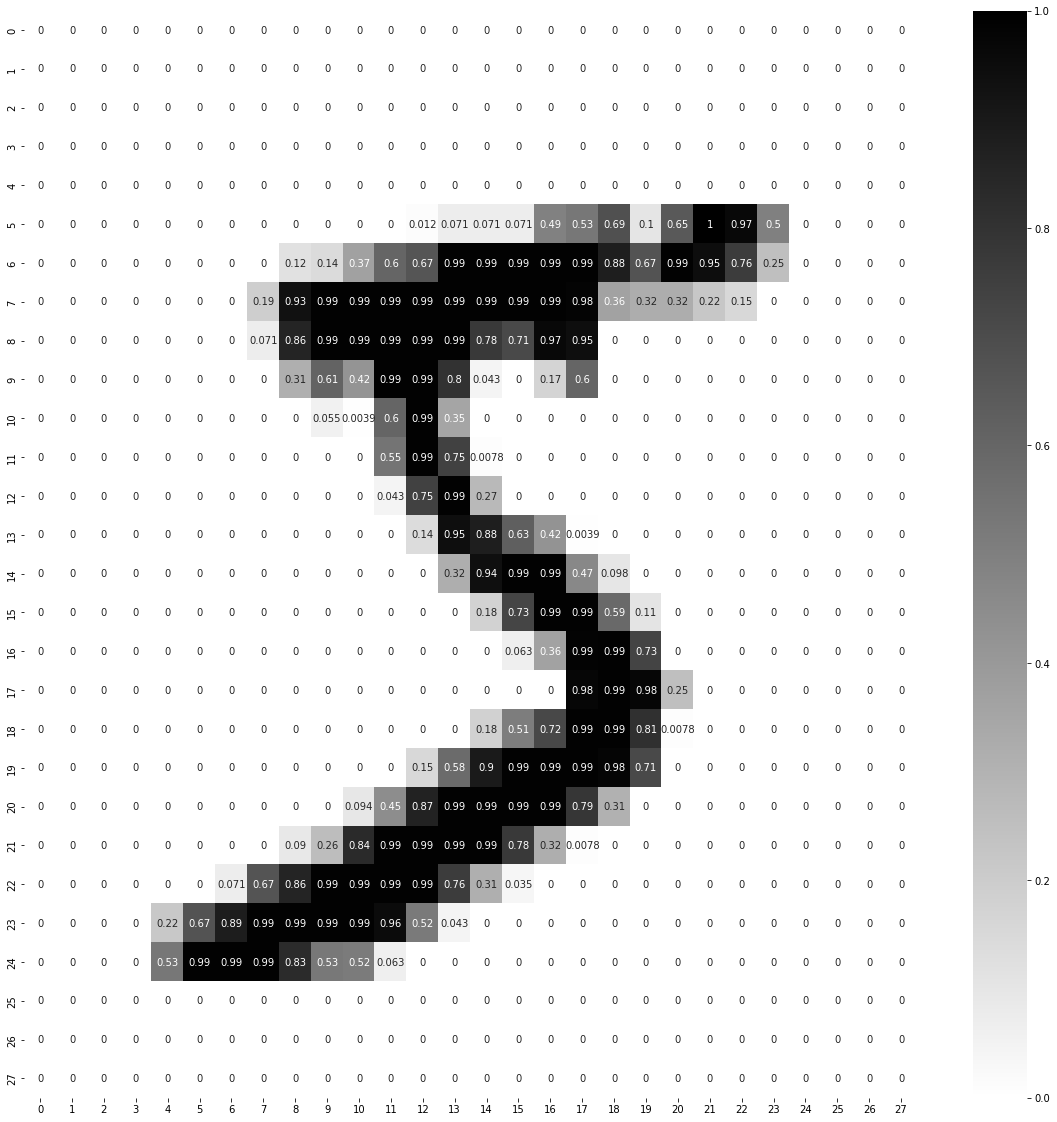

In [14]:
plt.figure(figsize = (20,20))
sns.heatmap(img/255,annot = True, cmap = "binary")

In [15]:
import math
math.exp(1)

2.718281828459045

In [16]:
print(1e+1, 1e+2, 1e+4, 1.5e+1, 1.5e+2)

10.0 100.0 10000.0 15.0 150.0


In [17]:
1.5*10**2

150.0

In [18]:
# taking first 5000 as validation and 1000 for testing (total 6000)
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:] # not divided by 255 because tey are labels

X_test = X_test/255
# dividing with 255 will help in reduce computation time and more search space for finding solution
# values ranges between 0-1 if we dividing with 255 

In [19]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [20]:
len(np.unique(y_train))

10

In [21]:
CLASSES = len(np.unique(y_train))
CLASSES

10

In [22]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=(28,28),name = 'inputLayer'),
    tf.keras.layers.Dense(300,activation="relu",name = 'hiddenLayer01'),
    tf.keras.layers.Dense(100,activation = "relu",name = 'hiddenLayer02'),
    tf.keras.layers.Dense(CLASSES,activation = "softmax",name = "outputLayer")

]

In [23]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [24]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [25]:
784*300 +300
#784* 300 - >weights; 300 bias

235500

In [26]:
print(300*100 +100)
print(100*10+10)

30100
1010


In [27]:
235500+30100+1010 # = > total trainable parameters

266610

In [28]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZERS = "SGD"
METRICS = ['accuracy']

model_clf.compile(loss = LOSS_FUNCTION, optimizer = OPTIMIZERS, metrics = METRICS)

In [29]:
EPOCHS = 30

VALIDATION = (X_valid,y_valid)

history = model_clf.fit(
    X_train,
    y_train,
    epochs =EPOCHS,
    batch_size=32,
    validation_data = VALIDATION
)


Epoch 1/30
1719/1719 [==============================] - 8s 3ms/step - loss: 0.5998 - accuracy: 0.8453 - val_loss: 0.3008 - val_accuracy: 0.9192
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2888 - accuracy: 0.9185 - val_loss: 0.2428 - val_accuracy: 0.9330
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2371 - accuracy: 0.9319 - val_loss: 0.2047 - val_accuracy: 0.9432
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2032 - accuracy: 0.9415 - val_loss: 0.1787 - val_accuracy: 0.9518
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1769 - accuracy: 0.9500 - val_loss: 0.1588 - val_accuracy: 0.9574
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1572 - accuracy: 0.9560 - val_loss: 0.1466 - val_accuracy: 0.9604
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1412 - accuracy: 0.9600 - val_loss: 0.1330 - val_accuracy:

In [30]:
55000/32
# batch_size=32 by default

1718.75

In [31]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.599834,0.845255,0.300757,0.9192
1,0.288765,0.918509,0.242833,0.9330
2,0.237147,0.931945,0.204698,0.9432
3,0.203161,0.941473,0.178687,0.9518
4,0.176944,0.950018,0.158783,0.9574
5,0.157172,0.955964,0.146629,0.9604
6,0.141166,0.960018,0.133048,0.9638
7,0.127183,0.963655,0.123023,0.9654
8,0.115670,0.967145,0.118393,0.9674
9,0.106096,0.970327,0.108241,0.9708


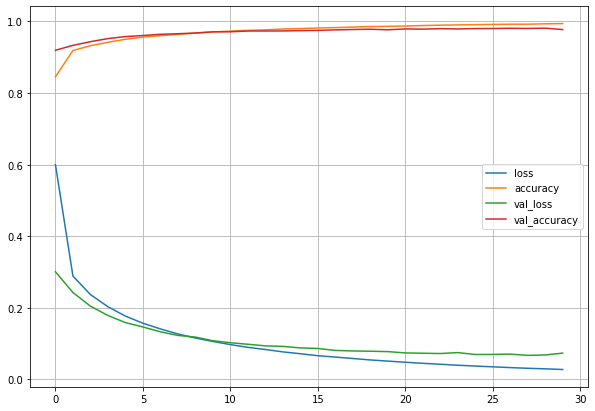

In [32]:
pd.DataFrame(history.history).plot(figsize = (10,7))
plt.grid(True)
plt.show()

In [33]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0781 - accuracy: 0.9753


[0.07806059718132019, 0.9753000140190125]

In [34]:
10000/32
# 312.5 ~ 313

312.5

In [35]:
model_clf.save('mnist_full.h5')

In [36]:
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)
y_prob

1/1 [==============================] - 0s 76ms/step


array([[3.3436490e-07, 2.4620638e-07, 1.5912146e-05, 3.8849315e-04,
        3.2942521e-10, 6.3238090e-08, 9.7201143e-13, 9.9958402e-01,
        9.2320499e-07, 9.8886258e-06],
       [1.6654334e-07, 3.7417125e-05, 9.9992383e-01, 3.8519916e-05,
        4.8845791e-14, 2.5413978e-08, 2.8652622e-08, 1.5839793e-11,
        1.7750087e-07, 1.1414442e-14],
       [2.5182342e-06, 9.9708015e-01, 6.5193221e-04, 1.1343342e-04,
        2.8274686e-04, 1.3566639e-04, 5.9675025e-05, 1.0245409e-03,
        6.0241832e-04, 4.6898112e-05]], dtype=float32)

In [37]:
X_new.shape

(3, 28, 28)

In [38]:
y_prob.shape

(3, 10)

In [39]:
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)
y_prob.round(3)

1/1 [==============================] - 0s 16ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.997, 0.001, 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

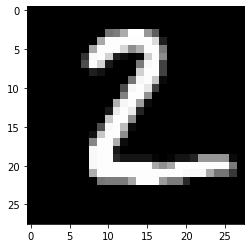

In [40]:
plt.imshow(X_new[1],cmap = "gray")

In [41]:
Y_pred = np.argmax(y_prob,axis = 1)
Y_pred

array([7, 2, 1])

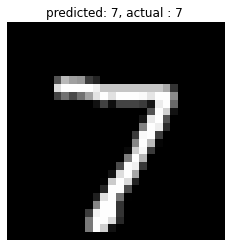

------------------------------------------------------------


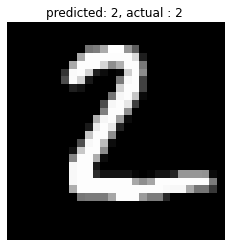

------------------------------------------------------------


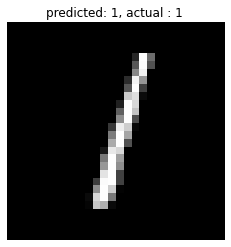

------------------------------------------------------------


In [42]:
for img_array,pred,actual in zip(X_new,Y_pred,y_test[:3]):
  plt.imshow(img_array,cmap = "gray")
  plt.title(f"predicted: {pred}, actual : {actual} ")
  plt.axis("off")
  plt.show()
  print("--"*30)

In [43]:
y_train.shape

(55000,)

In [44]:
y_train[1]

3

# Tranfer learning

## new problem statement

### Classify handwritten digits into odd or even

In [45]:
pretrained_model = tf.keras.models.load_model("mnist_full.h5")

In [46]:
pretrained_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [47]:
for layer in pretrained_model.layers:
  print(f"{layer.name}")

inputLayer
hiddenLayer01
hiddenLayer02
outputLayer


In [48]:
for layer in pretrained_model.layers:
  print(f"{layer.name} : {layer.trainable}")

inputLayer : True
hiddenLayer01 : True
hiddenLayer02 : True
outputLayer : True


In [49]:
for layer in pretrained_model.layers[:-1]:
  layer.trainable = False
  print(f"{layer.name} : {layer.trainable}")

inputLayer : False
hiddenLayer01 : False
hiddenLayer02 : False


In [50]:
for layer in pretrained_model.layers:
  print(f"{layer.name} : {layer.trainable}")

inputLayer : False
hiddenLayer01 : False
hiddenLayer02 : False
outputLayer : True


In [127]:
pretrained_model.layers[:-1]

In [51]:
lower_pretrained_model = pretrained_model.layers[:-1]

In [52]:


new_model = tf.keras.models.Sequential(lower_pretrained_model)
new_model.add(
    tf.keras.layers.Dense(2,activation = "softmax")
)

In [53]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer01 (Dense)       (None, 300)               235500    
                                                                 
 hiddenLayer02 (Dense)       (None, 100)               30100     
                                                                 
 dense (Dense)               (None, 2)                 202       
                                                                 
Total params: 265,802
Trainable params: 202
Non-trainable params: 265,600
_________________________________________________________________


In [54]:
100*2+2

202

In [55]:
def update_even_odd_labels(labels):
  for idx,label in enumerate(labels):
    labels[idx] = np.where(label%2 ==0,1,0)
    # 1-> even ; 0 -> odd
  return labels


In [56]:
ex_1 = np.array([1,2,3,4,5])
ex_1

array([1, 2, 3, 4, 5])

In [57]:
for idx,label in enumerate(ex_1):
  
  print(ex_1[idx],np.where(label%2==0,1,0))

1 0
2 1
3 0
4 1
5 0


In [58]:
y_train_bin,y_test_bin,y_valid_bin = update_even_odd_labels([y_train,y_test,y_valid])

In [59]:
np.unique(y_train_bin)

array([0, 1])

In [60]:
new_model.compile(loss="sparse_categorical_crossentropy",
                  optimizer = "SGD",
                  metrics = ['accuracy']
                  )

In [61]:
history = new_model.fit(
    X_train, y_train_bin, epochs = 10, validation_data = (X_valid,y_valid_bin)
)

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1843 - accuracy: 0.9326 - val_loss: 0.1380 - val_accuracy: 0.9498
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1339 - accuracy: 0.9516 - val_loss: 0.1323 - val_accuracy: 0.9512
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1246 - accuracy: 0.9552 - val_loss: 0.1204 - val_accuracy: 0.9584
Epoch 4/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1194 - accuracy: 0.9573 - val_loss: 0.1206 - val_accuracy: 0.9600
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1161 - accuracy: 0.9588 - val_loss: 0.1152 - val_accuracy: 0.9608
Epoch 6/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1137 - accuracy: 0.9593 - val_loss: 0.1182 - val_accuracy: 0.9596
Epoch 7/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1118 - accuracy: 0.9601 - val_loss: 0.1128 - val_accuracy:

In [62]:
new_model.evaluate(X_test,y_test_bin)

313/313 [==============================] - 1s 2ms/step - loss: 0.1131 - accuracy: 0.9605


[0.11310970783233643, 0.9605000019073486]

In [63]:
X_new = X_test[:3]
y_prob = new_model.predict(X_new)
y_prob.round(3)

1/1 [==============================] - 0s 47ms/step


array([[1.   , 0.   ],
       [0.   , 1.   ],
       [0.986, 0.014]], dtype=float32)

In [64]:
Y_pred = np.argmax(y_prob,axis = 1)
Y_pred

array([0, 1, 0])

In [65]:
y_test_bin[:3]

array([0, 1, 0])

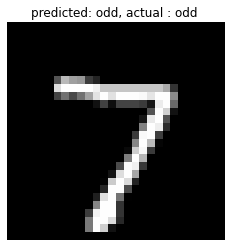

------------------------------------------------------------


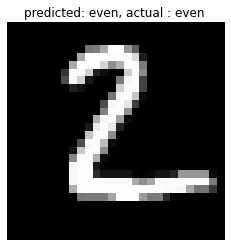

------------------------------------------------------------


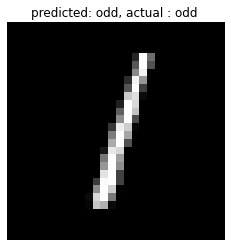

------------------------------------------------------------


In [66]:
for img_array,pred,actual in zip(X_new,Y_pred,y_test_bin[:3]):
  if pred == 1:
    pred = "even"
  else:
    pred = "odd"
  if actual == 1:
    actual = "even"
  else:
    actual = "odd"
  plt.imshow(img_array,cmap = "gray")
  plt.title(f"predicted: {pred}, actual : {actual} ")
  plt.axis("off")
  plt.show()
  print("--"*30)

# Train a CNN model on MNIST data

In [67]:
X_train[0].shape

(28, 28)

In [68]:
np.expand_dims(X_train,-1).shape

(55000, 28, 28, 1)

In [69]:
np.expand_dims(X_train,-2).shape

(55000, 28, 1, 28)

In [70]:
np.expand_dims(X_train,-3).shape

(55000, 1, 28, 28)

In [71]:
X_train_CNN = np.expand_dims(X_train,-1)
X_test_CNN = np.expand_dims(X_test,-1)
X_valid_CNN = np.expand_dims(X_valid,-1)

In [72]:
X_train_CNN[0].shape

(28, 28, 1)

In [73]:
X_train_CNN[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [74]:
input_shape = (28,28,1)# rows,cols,channels(blacknwhite; so 1)
CLASSES = 10
LAYERS =[
    tf.keras.Input(shape = input_shape),
    tf.keras.layers.Conv2D(32,kernel_size = (3,3),activation = "relu"),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Conv2D(64,kernel_size = (3,3),activation = "relu"),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(CLASSES,activation = "softmax")
]

In [75]:
CNN_model = tf.keras.Sequential(
    LAYERS
)

In [76]:
CNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [77]:
(3*3*1+1)*32   # (3,3)- filter, 1 for channel and last 1 is bias

320

In [78]:
28-3//1 +1

26

In [79]:
(26-2)//2 +1

13

In [80]:
(3*3*32 +1) *64 #previous channel we got 32 channel

18496

In [81]:
1600*10+10

16010

## **Assignment**
1. train this model
2. Try transfer learning by changing the last layer to classify no. as even and odd

In [82]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZERS = "SGD"
METRICS = ['accuracy']

CNN_model.compile(loss = LOSS_FUNCTION, optimizer = OPTIMIZERS, metrics = METRICS)

In [83]:
EPOCHS = 30

VALIDATION = (X_valid_CNN,y_valid)

history = CNN_model.fit(
    X_train_CNN,
    y_train,
    epochs =EPOCHS,
    batch_size=32,
    validation_data = VALIDATION
)

Epoch 1/30
1719/1719 [==============================] - 12s 3ms/step - loss: 0.5736 - accuracy: 0.8361 - val_loss: 0.2051 - val_accuracy: 0.9424
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1741 - accuracy: 0.9480 - val_loss: 0.1358 - val_accuracy: 0.9594
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1243 - accuracy: 0.9631 - val_loss: 0.1069 - val_accuracy: 0.9704
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1017 - accuracy: 0.9695 - val_loss: 0.0920 - val_accuracy: 0.9738
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0882 - accuracy: 0.9735 - val_loss: 0.0846 - val_accuracy: 0.9758
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0785 - accuracy: 0.9763 - val_loss: 0.0733 - val_accuracy: 0.9788
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0719 - accuracy: 0.9783 - val_loss: 0.0772 - val_accuracy

In [84]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.573595,0.836145,0.205055,0.9424
1,0.174068,0.948018,0.135776,0.9594
2,0.124256,0.963055,0.106854,0.9704
3,0.101702,0.969491,0.092002,0.9738
4,0.088163,0.973491,0.084563,0.9758
5,0.078495,0.976345,0.073265,0.9788
6,0.071938,0.978327,0.077217,0.9790
7,0.065960,0.980091,0.066573,0.9814
8,0.061766,0.981218,0.064651,0.9822
9,0.058943,0.982036,0.061550,0.9818


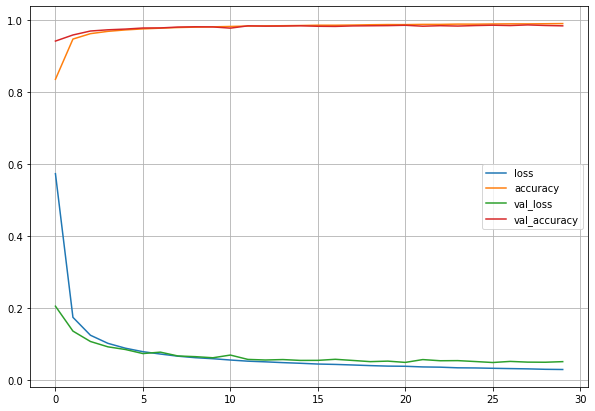

In [85]:
pd.DataFrame(history.history).plot(figsize = (10,7))
plt.grid(True)
plt.show()

In [88]:
CNN_model.save('mnist_full_cnn.h5')

In [89]:
X_new = X_test_CNN[:3]

y_prob = CNN_model.predict(X_new)
y_prob

1/1 [==============================] - 0s 88ms/step


array([[3.7510997e-10, 9.2712316e-10, 5.0861524e-07, 2.9992752e-06,
        7.7952103e-14, 1.4959113e-10, 1.4437941e-17, 9.9999642e-01,
        8.9347657e-10, 1.4240062e-07],
       [3.6858644e-08, 1.8884823e-06, 9.9999714e-01, 2.2856117e-09,
        1.4271554e-15, 2.0912791e-13, 2.6472856e-07, 2.5320686e-14,
        6.8432900e-07, 5.8083966e-16],
       [3.9854049e-06, 9.9892396e-01, 2.6743337e-05, 2.4105848e-06,
        4.4048033e-04, 1.5866397e-06, 4.1078645e-05, 2.7324443e-04,
        2.8421325e-04, 2.2851357e-06]], dtype=float32)

In [100]:
X_new = X_test_CNN[:3]

y_prob = CNN_model.predict(X_new)
y_prob.round(3)

1/1 [==============================] - 0s 17ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.999, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [93]:
Y_pred = np.argmax(y_prob,axis = 1)
Y_pred

array([7, 2, 1])

# Transfer learning

In [112]:
pre_trained_CNN_model = tf.keras.models.load_model("mnist_full_cnn.h5")

In [113]:
pre_trained_CNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [114]:
for layer in pre_trained_CNN_model.layers:
  print(f"{layer.name}")

conv2d
max_pooling2d
conv2d_1
max_pooling2d_1
flatten
dense_1


In [115]:
for layer in pre_trained_CNN_model.layers:
  print(f"{layer.name} : {layer.trainable}")

conv2d : True
max_pooling2d : True
conv2d_1 : True
max_pooling2d_1 : True
flatten : True
dense_1 : True


In [116]:
for layer in pre_trained_CNN_model.layers[:-1]:
  layer.trainable = False
  print(f"{layer.name} : {layer.trainable}")

conv2d : False
max_pooling2d : False
conv2d_1 : False
max_pooling2d_1 : False
flatten : False


In [117]:
for layer in pre_trained_CNN_model.layers:
  print(f"{layer.name} : {layer.trainable}")

conv2d : False
max_pooling2d : False
conv2d_1 : False
max_pooling2d_1 : False
flatten : False
dense_1 : True


In [128]:
pre_trained_CNN_model.layers[:-1]

In [122]:
lower_pretrained_cnn_model = pre_trained_CNN_model.layers[:-1]

In [123]:
new_cnn_model = tf.keras.models.Sequential(lower_pretrained_cnn_model)
new_cnn_model.add(
    tf.keras.layers.Dense(2,activation = "softmax")
)

In [132]:
new_cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 2)                

In [129]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZERS = "SGD"
METRICS = ['accuracy']

new_cnn_model.compile(loss = LOSS_FUNCTION, optimizer = OPTIMIZERS, metrics = METRICS)

In [130]:
EPOCHS = 30

VALIDATION = (X_valid_CNN,y_valid_bin)

history = CNN_model.fit(
    X_train_CNN,
    y_train_bin,
    epochs =EPOCHS,
    validation_data = VALIDATION
)

Epoch 1/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1853 - accuracy: 0.9444 - val_loss: 0.0789 - val_accuracy: 0.9706
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0761 - accuracy: 0.9738 - val_loss: 0.0971 - val_accuracy: 0.9634
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0655 - accuracy: 0.9772 - val_loss: 0.0560 - val_accuracy: 0.9802
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0593 - accuracy: 0.9795 - val_loss: 0.0596 - val_accuracy: 0.9806
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0545 - accuracy: 0.9812 - val_loss: 0.0490 - val_accuracy: 0.9852
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0518 - accuracy: 0.9823 - val_loss: 0.0467 - val_accuracy: 0.9862
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0489 - accuracy: 0.9830 - val_loss: 0.0453 - val_accuracy:

In [131]:
new_cnn_model.evaluate(X_test_CNN,y_test_bin)

313/313 [==============================] - 1s 3ms/step - loss: 1.7424 - accuracy: 0.3960


[1.742357850074768, 0.3959999978542328]